In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_excel("StudentsScore.xlsx")

In [8]:
data.head()

,StudentId,Attendance,Participation,FatherStudies,MotherStudies,OverallScore,Unnamed: 6,Unnamed: 7
0,1,90,80,diploma,diploma,A,NaN,NaN
1,2,80,80,bachelor,bachelor,A,NaN,NaN
2,3,70,85,bachelor,Master,A,NaN,NaN
3,4,60,90,diploma,doctorate,A,NaN,NaN
4,5,70,70,diploma,diploma,B,NaN,NaN


In [9]:
data['OverallScore'].value_counts()

A    180
B    102
C     92
Name: OverallScore, dtype: int64

In [10]:
data.isnull().sum()

StudentId          0
Attendance         0
Participation      0
FatherStudies      0
MotherStudies      0
OverallScore       0
Unnamed: 6       374
Unnamed: 7       374
dtype: int64

In [14]:
data['FatherStudies'].value_counts()

bachelor     144
doctorate     94
diploma       88
Master        48
Name: FatherStudies, dtype: int64

In [20]:
data['MotherStudies'].value_counts()

doctorate    114
bachelor      99
Master        89
diploma       72
Name: MotherStudies, dtype: int64

In [18]:
data["FatherStudies"][data["FatherStudies"]=="diploma"]=1
data["FatherStudies"][data["FatherStudies"]=="bachelor"]=2
data["FatherStudies"][data["FatherStudies"]=="Master"]=3
data["FatherStudies"][data["FatherStudies"]=="doctorate"]=4

In [22]:
data["MotherStudies"][data["MotherStudies"]=="diploma"]=1
data["MotherStudies"][data["MotherStudies"]=="bachelor"]=2
data["MotherStudies"][data["MotherStudies"]=="Master"]=3
data["MotherStudies"][data["MotherStudies"]=="doctorate"]=4

In [24]:
# data.corr()

In [25]:
X = data[["Attendance","Participation","FatherStudies","MotherStudies"]]
y = data["OverallScore"]
y

0      A
1      A
2      A
3      A
4      B
      ..
369    B
370    C
371    B
372    B
373    A
Name: OverallScore, Length: 374, dtype: object

In [26]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,Attendance,Participation,FatherStudies,MotherStudies
0,0.989378,0.557187,-1.267588,-1.498069
1,0.535635,0.557187,-0.359393,-0.592935
2,0.081892,0.883813,-0.359393,0.312199
3,-0.371851,1.210440,-1.267588,1.217333
4,0.081892,-0.096067,-1.267588,-1.498069
...,...,...,...,...
369,-2.413695,-0.749320,1.456998,1.217333
370,-1.959952,-0.749320,-0.359393,-1.498069
371,-1.506209,-0.096067,-0.359393,-0.592935
372,-1.959952,-0.096067,1.456998,1.217333


Text(0.5, 1.0, 'Success ')

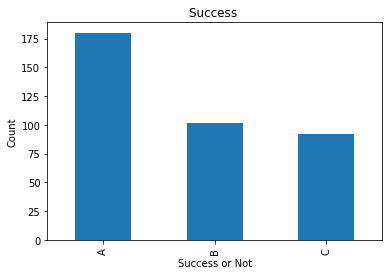

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
data.OverallScore.value_counts().plot(kind='bar')
plt.xlabel("Success or Not")
plt.ylabel("Count")
plt.title("Success ")

<AxesSubplot:xlabel='OverallScore', ylabel='count'>

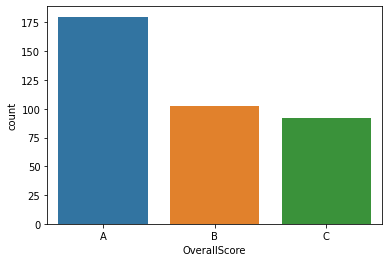

In [30]:
sns.countplot(y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [32]:
#Setup a knn classifier with k neighbors
Model = KNeighborsClassifier(n_neighbors=7)

In [33]:
#Fit the model
Model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [34]:
Model.score(X_test,y_test) # Accuracy of the model

0.8053097345132744

In [35]:
Model.score(X_train,y_train) # Accuracy of the model

0.8850574712643678

In [36]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [37]:
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

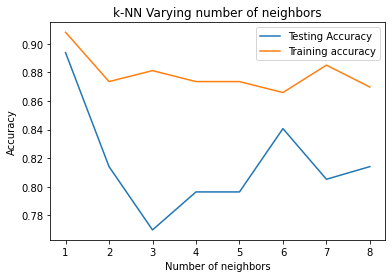

In [38]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [42]:
#Setup a knn classifier with k neighbors
Model = KNeighborsClassifier(n_neighbors=9)

In [48]:
#Fit the model
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

In [49]:
Model.score(X_test,y_test) # Accuracy of the model

0.7964601769911505

<AxesSubplot:>

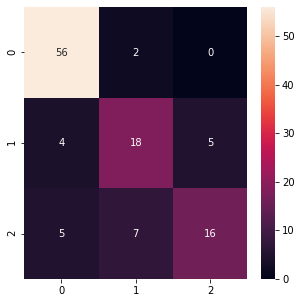

In [52]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(mat, annot=True)

In [53]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.86      0.97      0.91        58
           B       0.67      0.67      0.67        27
           C       0.76      0.57      0.65        28

    accuracy                           0.80       113
   macro avg       0.76      0.73      0.74       113
weighted avg       0.79      0.80      0.79       113



In [54]:
# Tuning Decision Tree Model
n_neighbors = [5,7,9,11,13,15,17,19,21]
weights = ["uniform","distance"]
metric = ["euclidean","manhattan","minkowski"]
param_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [55]:
knn = KNeighborsClassifier()
gs = GridSearchCV(estimator=knn,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(X_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

Best Score: 0.8541310541310543
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}


In [56]:
Model = KNeighborsClassifier(metric='euclidean',n_neighbors= 7, weights='distance')

In [57]:
knn_acc = metrics.accuracy_score(y_test, y_pred)
print(knn_acc)

0.7964601769911505
